In [1]:
#Importing libraries
import sys
!conda update --yes --prefix {sys.prefix} seaborn
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import chardet
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Lfs898\AppData\Local\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.11.0              |  py312haa95532_0         1.2 MB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following packages will be UPDATED:

  conda                              24.9.2-py312haa95532_0 --> 24.11.0-py312haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [2]:
#Importing dataset
with open('Alumni Engagement Model_Slim Counts_JulyFY23_Weighted_Updated SS_8.24.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
pd.read_csv('Alumni Engagement Model_Slim Counts_JulyFY23_Weighted_Updated SS_8.24.csv', encoding = enc['encoding'], low_memory=False)
#Original weighted sums dataset (FY23) with Student Supporter indicator added to CSV (8/24), per Student Supporter SQL pull
#No one-hot encoding needed as all entries are numerical

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_ACQ_REL_COUNT,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter
0,303500,1,1,3.162278,0.0,1,0,0,0,1,...,0,4.898979,1.000000,0,0,1.732051,6.319801,23.113109,19.996952,Y
1,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,Y
2,419308,0,0,0.000000,0.0,0,1,1,0,0,...,6,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,Y
3,288836,1,0,0.000000,0.0,0,0,1,0,1,...,4,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,Y
4,422908,1,1,1.000000,0.0,0,0,0,0,0,...,2,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44698,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN
44699,580356,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN
44700,708736,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN
44701,289861,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN


Initial AE model output dataset

In [4]:
#Assigning name to initial AE model output dataset
AE_Model_v2 = pd.read_csv('Alumni Engagement Model_Slim Counts_JulyFY23_Weighted_Updated SS_8.24.csv', encoding = enc['encoding'], low_memory=False)

In [5]:
#Changing 'Y' for Student Supporter indicator to '1'
AE_Model_v3 = AE_Model_v2.replace({'Student_Supporter': {'Y': 1}})

C:\Users\Lfs898\AppData\Local\Temp\ipykernel_15792\2687852114.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AE_Model_v3 = AE_Model_v2.replace({'Student_Supporter': {'Y': 1}})


In [6]:
AE_Model_v3

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_ACQ_REL_COUNT,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter
0,303500,1,1,3.162278,0.0,1,0,0,0,1,...,0,4.898979,1.000000,0,0,1.732051,6.319801,23.113109,19.996952,1.0
1,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,1.0
2,419308,0,0,0.000000,0.0,0,1,1,0,0,...,6,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,1.0
3,288836,1,0,0.000000,0.0,0,0,1,0,1,...,4,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,1.0
4,422908,1,1,1.000000,0.0,0,0,0,0,0,...,2,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44698,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN
44699,580356,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN
44700,708736,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN
44701,289861,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN


In [7]:
#Changing Student Supporter 'NaN' to '0' - did this for whole sheet, though it was previously done for other columns in AE Model
AE_Model_v4 = AE_Model_v3.fillna(0)
AE_Model_v4

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_ACQ_REL_COUNT,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter
0,303500,1,1,3.162278,0.0,1,0,0,0,1,...,0,4.898979,1.000000,0,0,1.732051,6.319801,23.113109,19.996952,1.0
1,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,1.0
2,419308,0,0,0.000000,0.0,0,1,1,0,0,...,6,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,1.0
3,288836,1,0,0.000000,0.0,0,0,1,0,1,...,4,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,1.0
4,422908,1,1,1.000000,0.0,0,0,0,0,0,...,2,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44698,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0
44699,580356,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0
44700,708736,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0
44701,289861,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0


In [8]:
#Importing Sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [9]:
#Getting column list to add to feature_cols\n",
print(AE_Model_v4.columns.tolist())

['ID_NUMBER', 'KLC_CURRENT', 'KLC_LYBUNT', 'KSM_SPEAKER_COUNT_SQ', 'KSM_EVENT_HOST_COUNT_SQ', 'KSM_KCORPREC_COUNT', 'KSM_STU_ACT_COUNT', 'KSM_KAD_CALLER_COUNT', 'KSM_INTERVIEWER_COUNT', 'KSM_SPOUSE_COUNT', 'KSM_CHILD_COUNT', 'KSM_NUC_REL_COUNT_SQ', 'KSM_NONNUC_REL_COUNT_SQ', 'KSM_ACQ_REL_COUNT', 'KSM_INPER_EVENT_SQ', 'KSM_VIRT_EVENT_SQ', 'ALUMNICLUB_EXEC_ROLES', 'ALUMNICLUB_MEMBER_ROLES', 'CLOSEDPROP_FUNDED_SQ', 'NGC_LT_Log_10', 'sum_stats_sq', 'weighted_sum_stats', 'Student_Supporter']


In [10]:
#Splitting dataset in features (independent variables) and target variable (dependent variable)
feature_cols = ['KLC_CURRENT', 'KLC_LYBUNT', 'KSM_SPEAKER_COUNT_SQ', 'KSM_EVENT_HOST_COUNT_SQ', 'KSM_KCORPREC_COUNT',
                'KSM_STU_ACT_COUNT', 'KSM_KAD_CALLER_COUNT', 'KSM_INTERVIEWER_COUNT', 'KSM_SPOUSE_COUNT', 'KSM_CHILD_COUNT',
                'KSM_NUC_REL_COUNT_SQ', 'KSM_NONNUC_REL_COUNT_SQ', 'KSM_ACQ_REL_COUNT', 'KSM_INPER_EVENT_SQ', 'KSM_VIRT_EVENT_SQ',
                'ALUMNICLUB_EXEC_ROLES', 'ALUMNICLUB_MEMBER_ROLES', 'CLOSEDPROP_FUNDED_SQ', 'NGC_LT_Log_10', 'weighted_sum_stats']
X = AE_Model_v4[feature_cols] # Features variables
Y = AE_Model_v4['Student_Supporter'] # Target variable

In [11]:
#Splitting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [12]:
#Checking shape (rows/cols)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(33527, 20)

(33527,)

(11176, 20)

(11176,)

In [13]:
#Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [14]:
#Printing coefficients and intercept
print(log_reg.coef_)
pd.DataFrame(["Intercept", log_reg.intercept_[0]])
pd.DataFrame(list(zip(feature_cols, log_reg.coef_[0])), columns = ["Feature", "Beta"])

[[-1.65237831 -1.38064633  5.57293436  0.22140578  4.29450397 -0.60381982
   3.66728185  3.04424455 -1.57324486 -1.97271866 -0.74754443 -0.90743395
  -0.83524368 -0.46265623 -0.2540565  -1.0555486  -1.41124183 -1.65260504
  -1.38335519  1.61048612]]


,0
0,Intercept
1,-3.133831


,Feature,Beta
0,KLC_CURRENT,-1.652378
1,KLC_LYBUNT,-1.380646
2,KSM_SPEAKER_COUNT_SQ,5.572934
3,KSM_EVENT_HOST_COUNT_SQ,0.221406
4,KSM_KCORPREC_COUNT,4.294504
5,KSM_STU_ACT_COUNT,-0.603820
6,KSM_KAD_CALLER_COUNT,3.667282
7,KSM_INTERVIEWER_COUNT,3.044245
8,KSM_SPOUSE_COUNT,-1.573245
9,KSM_CHILD_COUNT,-1.972719


In [15]:
#Evaluate the model
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100)) #Original form - print(\"Accuracy: {:.2f}%\".format(accuracy * 100))

Accuracy: 89.67%


In [16]:
#Predict if weighted_sum_stat 9 if alum is student supporter
predicted = (log_reg.predict(x_test) > .5).astype(int) #greater than .5 predicts Student Supporter
np.sum(predicted == y_test) / len(y_test) #summing every time the prediction is equal to the actual output and dividing by length of output, we get the same number
print(predicted)

0.8966535433070866

[0 0 0 ... 1 0 0]


In [17]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [18]:
y_pred.mean()

0.047780959198282034

In [19]:
#Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) # Might need to update

[[9510   23]
 [1132  511]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      9533
         1.0       0.96      0.31      0.47      1643

    accuracy                           0.90     11176
   macro avg       0.93      0.65      0.71     11176
weighted avg       0.90      0.90      0.87     11176



- True positive: 9510 (top-left) – Number of positives we predicted correctly
- False negative: 23 (top-right) – Number of positives we predicted incorrectly
- False positive:  1132 (lower-left) – Number of negatives we predicted incorrectly
- True negative: 511 (lower-right) – Number of negatives we predicted correctly

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='KSM_STU_ACT_COUNT', ylabel='NGC_LT_Log_10'>

Text(0.5, 0, 'Student_Activity')

Text(0, 0.5, 'NGC_LT')

Text(0.5, 1.0, 'Logistic Regression Decision Boundary\nAccuracy: 89.67%')

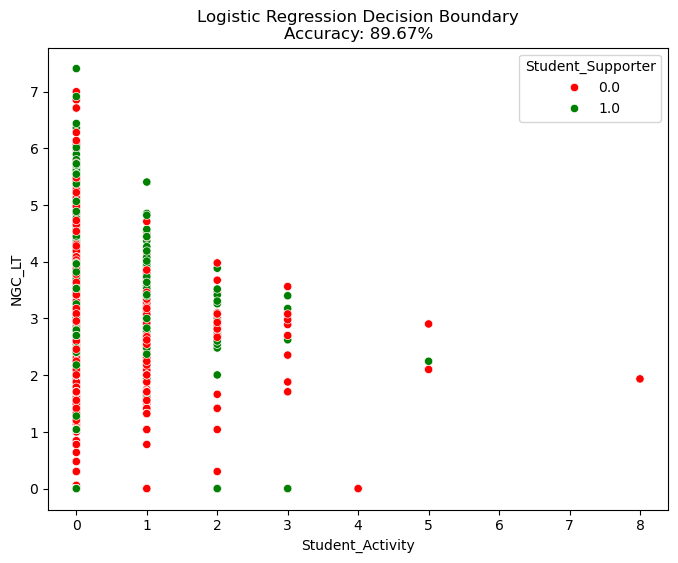

In [21]:
#Visualize the decision boundary with accuracy information, looking at NGC and Student Activities
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test['KSM_STU_ACT_COUNT'], y=x_test['NGC_LT_Log_10'], hue=y_test, palette={
0: 'red', 1: 'green'}, marker='o')
#x = student_activity; y = NGC_LT_Log_10
plt.xlabel('Student_Activity')
plt.ylabel('NGC_LT')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Student_Supporter", loc="upper right")
plt.show()

AE Model output with Degree Years dataset

In [23]:
#Assigning name to initial AE model output with Degree Years dataset
AE_Model_DY = pd.read_csv('Alumni Engagement Model_Slim Counts_JulyFY23_Weighted_Updated SS_with Degree years_8.24.csv', encoding = enc['encoding'], low_memory=False)
AE_Model_DY

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter,Years_since_grad
0,303500,1,1,3.162278,0.0,1,0,0,0,1,...,4.898979,1.000000,0,0,1.732051,6.319801,23.113109,19.996952,Y,42.0
1,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,Y,16.0
2,419308,0,0,0.000000,0.0,0,1,1,0,0,...,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,Y,25.0
3,288836,1,0,0.000000,0.0,0,0,1,0,1,...,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,Y,44.0
4,422908,1,1,1.000000,0.0,0,0,0,0,0,...,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,Y,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44698,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,12.0
44699,580356,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,15.0
44700,708736,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,8.0
44701,289861,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,43.0


In [24]:
#Changing 'Y' for Student Supporter indicator to '1'
AE_Model_DY_v2 = AE_Model_DY.replace({'Student_Supporter': {'Y': 1}})
AE_Model_DY_v2

C:\Users\Lfs898\AppData\Local\Temp\ipykernel_15792\2513649816.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AE_Model_DY_v2 = AE_Model_DY.replace({'Student_Supporter': {'Y': 1}})


,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter,Years_since_grad
0,303500,1,1,3.162278,0.0,1,0,0,0,1,...,4.898979,1.000000,0,0,1.732051,6.319801,23.113109,19.996952,1.0,42.0
1,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,1.0,16.0
2,419308,0,0,0.000000,0.0,0,1,1,0,0,...,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,1.0,25.0
3,288836,1,0,0.000000,0.0,0,0,1,0,1,...,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,1.0,44.0
4,422908,1,1,1.000000,0.0,0,0,0,0,0,...,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44698,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,12.0
44699,580356,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,15.0
44700,708736,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,8.0
44701,289861,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,NaN,43.0


In [25]:
#Changing Student Supporter 'NaN' to '0' - did this for whole sheet, though it was previously done for other columns in AE Model
AE_Model_DY_v3 = AE_Model_DY_v2.fillna(0)
AE_Model_DY_v3

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter,Years_since_grad
0,303500,1,1,3.162278,0.0,1,0,0,0,1,...,4.898979,1.000000,0,0,1.732051,6.319801,23.113109,19.996952,1.0,42.0
1,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,1.0,16.0
2,419308,0,0,0.000000,0.0,0,1,1,0,0,...,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,1.0,25.0
3,288836,1,0,0.000000,0.0,0,0,1,0,1,...,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,1.0,44.0
4,422908,1,1,1.000000,0.0,0,0,0,0,0,...,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44698,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0,12.0
44699,580356,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0,15.0
44700,708736,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0,8.0
44701,289861,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0.0,43.0


In [26]:
#Splitting dataset in features (independent variables) and target variable (dependent variable)
feature_cols_DG = ['KLC_CURRENT', 'KLC_LYBUNT', 'KSM_SPEAKER_COUNT_SQ', 'KSM_EVENT_HOST_COUNT_SQ', 'KSM_KCORPREC_COUNT',
                'KSM_STU_ACT_COUNT', 'KSM_KAD_CALLER_COUNT', 'KSM_INTERVIEWER_COUNT', 'KSM_SPOUSE_COUNT', 'KSM_CHILD_COUNT',
                'KSM_NUC_REL_COUNT_SQ', 'KSM_NONNUC_REL_COUNT_SQ', 'KSM_ACQ_REL_COUNT', 'KSM_INPER_EVENT_SQ', 'KSM_VIRT_EVENT_SQ',
                'ALUMNICLUB_EXEC_ROLES', 'ALUMNICLUB_MEMBER_ROLES', 'CLOSEDPROP_FUNDED_SQ', 'NGC_LT_Log_10', 'weighted_sum_stats', 'Years_since_grad']
XDG = AE_Model_DY_v3[feature_cols_DG] # Features variables
YDG = AE_Model_DY_v3['Student_Supporter'] # Target variable

In [27]:
#Splitting the dataset into training and test dataset
xdg_train, xdg_test, ydg_train, ydg_test = train_test_split(XDG, YDG, random_state=1)

In [28]:
#Checking shape (rows/cols)
xdg_train.shape
ydg_train.shape
xdg_test.shape
ydg_test.shape

(33527, 21)

(33527,)

(11176, 21)

(11176,)

In [29]:
#Create a Logistic Regression Object, perform Logistic Regression
log_regdg = LogisticRegression()
log_regdg.fit(xdg_train, ydg_train)

C:\Users\Lfs898\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#Printing coefficients and intercept
print(log_regdg.coef_)
pd.DataFrame(["Intercept", log_regdg.intercept_[0]])
pd.DataFrame(list(zip(feature_cols_DG, log_regdg.coef_[0])), columns = ["Feature", "Beta"])

[[-1.71529093 -1.5754977   7.9865107   0.08215066  3.70981619 -0.64798111
   2.21197599  1.12377322 -1.5344274  -1.37783152 -0.13135633 -0.18463444
  -1.1552883  -0.57632096 -0.28519973 -0.74057897 -1.42611826 -1.50371115
  -1.382497    1.67977717 -0.01782538]]


,0
0,Intercept
1,-2.824881


,Feature,Beta
0,KLC_CURRENT,-1.715291
1,KLC_LYBUNT,-1.575498
2,KSM_SPEAKER_COUNT_SQ,7.986511
3,KSM_EVENT_HOST_COUNT_SQ,0.082151
4,KSM_KCORPREC_COUNT,3.709816
5,KSM_STU_ACT_COUNT,-0.647981
6,KSM_KAD_CALLER_COUNT,2.211976
7,KSM_INTERVIEWER_COUNT,1.123773
8,KSM_SPOUSE_COUNT,-1.534427
9,KSM_CHILD_COUNT,-1.377832


In [31]:
#Evaluate the model
ydg_pred = log_regdg.predict(xdg_test)
accuracydg = accuracy_score(ydg_test, ydg_pred)
print("Accuracy: {:.2f}%".format(accuracydg * 100)) #Original form - print(\"Accuracy: {:.2f}%\".format(accuracy * 100))

Accuracy: 89.58%


In [32]:
#Predict if weighted_sum_stat 9 if alum is student supporter
predicted_dg = (log_regdg.predict(xdg_test) > .5).astype(int) #greater than .5 predicts Student Supporter
np.sum(predicted_dg == ydg_test) / len(ydg_test) #summing every time the prediction is equal to the actual output and dividing by length of output, we get the same number
print(predicted)

0.8957587687902648

[0 0 0 ... 1 0 0]


In [33]:
# Perform prediction using the test dataset
ydg_pred = log_regdg.predict(xdg_test)

In [34]:
ydg_pred.mean()

0.047602004294917684

In [35]:
#Evaluate the model
print(confusion_matrix(ydg_test, ydg_pred))
print(classification_report(ydg_test, ydg_pred)) # Might need to update

[[9506   27]
 [1138  505]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      9533
         1.0       0.95      0.31      0.46      1643

    accuracy                           0.90     11176
   macro avg       0.92      0.65      0.70     11176
weighted avg       0.90      0.90      0.87     11176



- True positive: 9506 (top-left) – Number of positives we predicted correctly
- False negative: 27 (top-right) – Number of positives we predicted incorrectly
- False positive:  1138 (lower-left) – Number of negatives we predicted incorrectly
- True negative: 505 (lower-right) – Number of negatives we predicted correctly

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Years_since_grad', ylabel='NGC_LT_Log_10'>

Text(0.5, 0, 'Years_since_grad')

Text(0, 0.5, 'NGC_LT')

Text(0.5, 1.0, 'Logistic Regression Decision Boundary\nAccuracy: 89.58%')

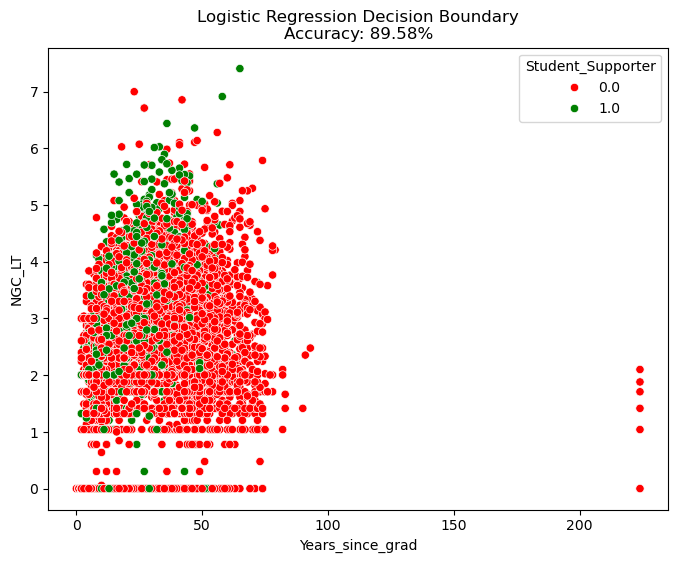

In [37]:
#Visualize the decision boundary with accuracy information, looking at NGC and Degree Years
plt.figure(figsize=(8, 6))
sns.scatterplot(x=xdg_test['Years_since_grad'], y=xdg_test['NGC_LT_Log_10'], hue=ydg_test, palette={
0: 'red', 1: 'green'}, marker='o')
#x = student_activity; y = NGC_LT_Log_10
plt.xlabel('Years_since_grad')
plt.ylabel('NGC_LT')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracydg * 100))
plt.legend(title="Student_Supporter", loc="upper right")
plt.show()

In [38]:
#Think about dropping Years_since_grad > 100

AE Model output_50/50 Student Supporter/non-Student Supporter dataset

In [40]:
#Assigning name to initial AE model output with 50/50 SS split dataset
AE_Model_50 = pd.read_csv('Alumni Engagement Model_Slim Counts_JulyFY23_Weighted_Updated SS__50_50 split_8.24.csv', encoding = enc['encoding'], low_memory=False)
AE_Model_50
AE_Model_50.shape

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_ACQ_REL_COUNT,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter
0,609461,0,0,0.0,0.0,0,0,0,0,0,...,0,1.414214,0.000000,0,0,0.0,2.699838,4.114051,3.406945,NaN
1,336364,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,NaN
2,830609,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.414214,0,0,0.0,0.000000,1.414214,0.471405,NaN
3,580624,0,0,0.0,0.0,0,0,0,0,0,...,0,1.732051,1.000000,0,0,0.0,2.399674,5.131725,3.599032,NaN
4,392142,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.0,2.478566,2.478566,2.478566,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,863255,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,Y
13106,468871,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,Y
13107,818877,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,Y
13108,300735,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.0,0.301030,0.301030,0.301030,Y


(13110, 23)

In [41]:
#Changing 'Y' for Student Supporter indicator to '1'
AE_Model_50_v2 = AE_Model_50.replace({'Student_Supporter': {'Y': 1}})
AE_Model_50_v2

C:\Users\Lfs898\AppData\Local\Temp\ipykernel_15792\611895421.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AE_Model_50_v2 = AE_Model_50.replace({'Student_Supporter': {'Y': 1}})


,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_ACQ_REL_COUNT,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter
0,609461,0,0,0.0,0.0,0,0,0,0,0,...,0,1.414214,0.000000,0,0,0.0,2.699838,4.114051,3.406945,NaN
1,336364,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,NaN
2,830609,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.414214,0,0,0.0,0.000000,1.414214,0.471405,NaN
3,580624,0,0,0.0,0.0,0,0,0,0,0,...,0,1.732051,1.000000,0,0,0.0,2.399674,5.131725,3.599032,NaN
4,392142,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.0,2.478566,2.478566,2.478566,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,863255,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,1.0
13106,468871,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,1.0
13107,818877,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,1.0
13108,300735,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.0,0.301030,0.301030,0.301030,1.0


In [42]:
#Changing Student Supporter 'NaN' to '0' - did this for whole sheet, though it was previously done for other columns in AE Model
AE_Model_50_v3 = AE_Model_50_v2.fillna(0)
AE_Model_50_v3

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_ACQ_REL_COUNT,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter
0,609461,0,0,0.0,0.0,0,0,0,0,0,...,0,1.414214,0.000000,0,0,0.0,2.699838,4.114051,3.406945,0.0
1,336364,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,0.0
2,830609,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.414214,0,0,0.0,0.000000,1.414214,0.471405,0.0
3,580624,0,0,0.0,0.0,0,0,0,0,0,...,0,1.732051,1.000000,0,0,0.0,2.399674,5.131725,3.599032,0.0
4,392142,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.0,2.478566,2.478566,2.478566,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,863255,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,1.0
13106,468871,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,1.0
13107,818877,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,1.000000,0,0,0.0,0.000000,1.000000,0.333333,1.0
13108,300735,0,0,0.0,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.0,0.301030,0.301030,0.301030,1.0


In [43]:
#Splitting dataset in features (independent variables) and target variable (dependent variable)
feature_cols_50 = ['KLC_CURRENT', 'KLC_LYBUNT', 'KSM_SPEAKER_COUNT_SQ', 'KSM_EVENT_HOST_COUNT_SQ', 'KSM_KCORPREC_COUNT',
                'KSM_STU_ACT_COUNT', 'KSM_KAD_CALLER_COUNT', 'KSM_INTERVIEWER_COUNT', 'KSM_SPOUSE_COUNT', 'KSM_CHILD_COUNT',
                'KSM_NUC_REL_COUNT_SQ', 'KSM_NONNUC_REL_COUNT_SQ', 'KSM_ACQ_REL_COUNT', 'KSM_INPER_EVENT_SQ', 'KSM_VIRT_EVENT_SQ',
                'ALUMNICLUB_EXEC_ROLES', 'ALUMNICLUB_MEMBER_ROLES', 'CLOSEDPROP_FUNDED_SQ', 'NGC_LT_Log_10', 'weighted_sum_stats']
X50 = AE_Model_50_v3[feature_cols_50] # Features variables
Y50 = AE_Model_50_v3['Student_Supporter'] # Target variable

In [44]:
#Splitting the dataset into training and test dataset
x50_train, x50_test, y50_train, y50_test = train_test_split(X50, Y50, random_state=1)

In [45]:
#Checking shape (rows/cols)
x50_train.shape
y50_train.shape
x50_test.shape
y50_test.shape

(9832, 20)

(9832,)

(3278, 20)

(3278,)

In [46]:
#Create a Logistic Regression Object, perform Logistic Regression
log_reg50 = LogisticRegression()
log_reg50.fit(x50_train, y50_train)

LogisticRegression()

In [47]:
#Printing coefficients and intercept
print(log_reg50.coef_)
pd.DataFrame(["Intercept", log_reg50.intercept_[0]])
pd.DataFrame(list(zip(feature_cols_50, log_reg50.coef_[0])), columns = ["Feature", "Beta"])

[[-0.93552778 -1.26196787  4.29094871  0.15850237  3.35291357 -0.39694776
   2.56443083  2.02801429 -1.21447137 -0.9998811  -0.40789819 -0.50865677
  -0.63390011 -0.33431428 -0.08989882 -1.11840361 -0.82025727 -1.67790279
  -1.09658143  1.3237642 ]]


,0
0,Intercept
1,-1.418325


,Feature,Beta
0,KLC_CURRENT,-0.935528
1,KLC_LYBUNT,-1.261968
2,KSM_SPEAKER_COUNT_SQ,4.290949
3,KSM_EVENT_HOST_COUNT_SQ,0.158502
4,KSM_KCORPREC_COUNT,3.352914
5,KSM_STU_ACT_COUNT,-0.396948
6,KSM_KAD_CALLER_COUNT,2.564431
7,KSM_INTERVIEWER_COUNT,2.028014
8,KSM_SPOUSE_COUNT,-1.214471
9,KSM_CHILD_COUNT,-0.999881


In [48]:
#Evaluate the model
y50_pred = log_reg50.predict(x50_test)
accuracy50 = accuracy_score(y50_test, y50_pred)
print("Accuracy: {:.2f}%".format(accuracy50 * 100)) #Original form - print(\"Accuracy: {:.2f}%\".format(accuracy * 100))

Accuracy: 72.36%


In [49]:
#Predict if weighted_sum_stat 9 if alum is student supporter
predicted_50 = (log_reg50.predict(x50_test) > .5).astype(int) #greater than .5 predicts Student Supporter
np.sum(predicted_50 == y50_test) / len(y50_test) #summing every time the prediction is equal to the actual output and dividing by length of output, we get the same number
print(predicted_50)

0.7236119585112873

[1 0 1 ... 1 0 0]


In [50]:
# Perform prediction using the test dataset
y50_pred = log_reg50.predict(x50_test)

In [51]:
y50_pred.mean()

0.3462477120195241

In [52]:
#Evaluate the model
print(confusion_matrix(y50_test, y50_pred))
print(classification_report(y50_test, y50_pred)) # Might need to update

[[1451  214]
 [ 692  921]]
              precision    recall  f1-score   support

         0.0       0.68      0.87      0.76      1665
         1.0       0.81      0.57      0.67      1613

    accuracy                           0.72      3278
   macro avg       0.74      0.72      0.72      3278
weighted avg       0.74      0.72      0.72      3278



- True positive: 1451 (top-left) – Number of positives we predicted correctly
- False negative: 214 (top-right) – Number of positives we predicted incorrectly
- False positive:  692 (lower-left) – Number of negatives we predicted incorrectly
- True negative: 921 (lower-right) – Number of negatives we predicted correctly

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='KSM_STU_ACT_COUNT', ylabel='NGC_LT_Log_10'>

Text(0.5, 0, 'Student_Activities')

Text(0, 0.5, 'NGC_LT')

Text(0.5, 1.0, 'Logistic Regression Decision Boundary\nAccuracy: 72.36%')

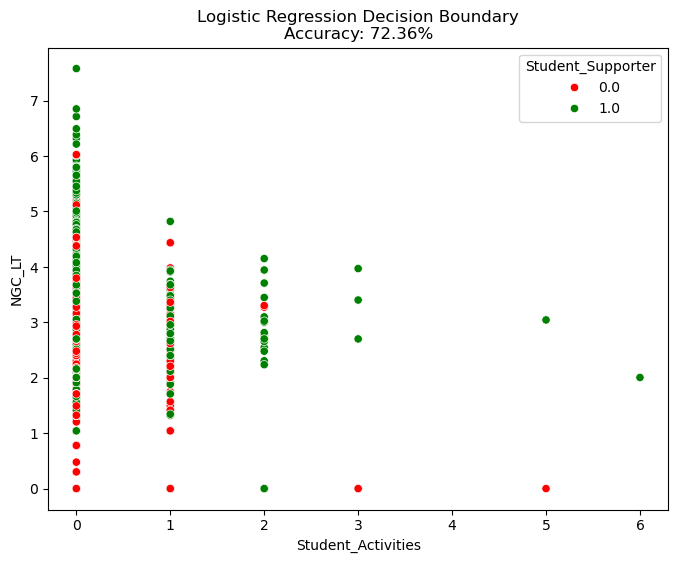

In [54]:
#Visualize the decision boundary with accuracy information, looking at NGC and Degree Years
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x50_test['KSM_STU_ACT_COUNT'], y=x50_test['NGC_LT_Log_10'], hue=y50_test, palette={
0: 'red', 1: 'green'}, marker='o')
#x = student_activity; y = NGC_LT_Log_10
plt.xlabel('Student_Activities')
plt.ylabel('NGC_LT')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy50 * 100))
plt.legend(title="Student_Supporter", loc="upper right")
plt.show()

AE Model output_50/50 Student Supporters split w/ degree years dataset

In [56]:
#Assigning name to initial AE model output with 50/50 SS split and Degree Years dataset
AE_Model_50ss = pd.read_csv('Alumni Engagement Model_Slim Counts_JulyFY23_Weighted_Updated SS__50_50 split_w Degree Years_8.24.csv', encoding = enc['encoding'], low_memory=False)
AE_Model_50ss

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Years_since_grad,Student_Supporter
0,579730,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,15.0,NaN
1,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,12.0,NaN
2,305945,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,33.0,NaN
3,300735,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,43.0,Y
4,719520,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,8.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,422908,1,1,1.000000,0.0,0,0,0,0,0,...,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,24.0,Y
13106,288836,1,0,0.000000,0.0,0,0,1,0,1,...,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,44.0,Y
13107,419308,0,0,0.000000,0.0,0,1,1,0,0,...,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,25.0,Y
13108,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,16.0,Y


In [57]:
#Changing 'Y' for Student Supporter indicator to '1'
AE_Model_50ss_v2 = AE_Model_50ss.replace({'Student_Supporter': {'Y': 1}})
AE_Model_50ss_v2

C:\Users\Lfs898\AppData\Local\Temp\ipykernel_15792\3851849928.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  AE_Model_50ss_v2 = AE_Model_50ss.replace({'Student_Supporter': {'Y': 1}})


,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Years_since_grad,Student_Supporter
0,579730,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,15.0,NaN
1,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,12.0,NaN
2,305945,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,33.0,NaN
3,300735,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,43.0,1.0
4,719520,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,422908,1,1,1.000000,0.0,0,0,0,0,0,...,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,24.0,1.0
13106,288836,1,0,0.000000,0.0,0,0,1,0,1,...,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,44.0,1.0
13107,419308,0,0,0.000000,0.0,0,1,1,0,0,...,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,25.0,1.0
13108,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,16.0,1.0


In [58]:
#Changing Student Supporter 'NaN' to '0' - did this for whole sheet, though it was previously done for other columns in AE Model
AE_Model_50ss_v3 = AE_Model_50ss_v2.fillna(0)
AE_Model_50ss_v3

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Years_since_grad,Student_Supporter
0,579730,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,15.0,0.0
1,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,12.0,0.0
2,305945,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,33.0,0.0
3,300735,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,43.0,1.0
4,719520,0,0,0.000000,0.0,0,0,0,0,0,...,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,422908,1,1,1.000000,0.0,0,0,0,0,0,...,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,24.0,1.0
13106,288836,1,0,0.000000,0.0,0,0,1,0,1,...,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,44.0,1.0
13107,419308,0,0,0.000000,0.0,0,1,1,0,0,...,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,25.0,1.0
13108,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,16.0,1.0


In [59]:
#Splitting dataset in features (independent variables) and target variable (dependent variable)
feature_cols_50ss = ['KLC_CURRENT', 'KLC_LYBUNT', 'KSM_SPEAKER_COUNT_SQ', 'KSM_EVENT_HOST_COUNT_SQ', 'KSM_KCORPREC_COUNT',
                'KSM_STU_ACT_COUNT', 'KSM_KAD_CALLER_COUNT', 'KSM_INTERVIEWER_COUNT', 'KSM_SPOUSE_COUNT', 'KSM_CHILD_COUNT',
                'KSM_NUC_REL_COUNT_SQ', 'KSM_NONNUC_REL_COUNT_SQ', 'KSM_ACQ_REL_COUNT', 'KSM_INPER_EVENT_SQ', 'KSM_VIRT_EVENT_SQ',
                'ALUMNICLUB_EXEC_ROLES', 'ALUMNICLUB_MEMBER_ROLES', 'CLOSEDPROP_FUNDED_SQ', 'NGC_LT_Log_10', 'weighted_sum_stats', 'Years_since_grad']
X50ss = AE_Model_50ss_v3[feature_cols_DG] # Features variables
Y50ss = AE_Model_50ss_v3['Student_Supporter'] # Target variable

In [60]:
#Splitting the dataset into training and test dataset
x50ss_train, x50ss_test, y50ss_train, y50ss_test = train_test_split(X50ss, Y50ss, random_state=1)

In [61]:
#Checking shape (rows/cols)
x50ss_train.shape
y50ss_train.shape
x50ss_test.shape
y50ss_test.shape

(9832, 21)

(9832,)

(3278, 21)

(3278,)

In [62]:
#Create a Logistic Regression Object, perform Logistic Regression
log_reg50ss = LogisticRegression()
log_reg50ss.fit(x50ss_train, y50ss_train)

C:\Users\Lfs898\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
#Printing coefficients and intercept
print(log_reg50ss.coef_)
pd.DataFrame(["Intercept", log_reg50ss.intercept_[0]])
pd.DataFrame(list(zip(feature_cols_50ss, log_reg50ss.coef_[0])), columns = ["Feature", "Beta"])

[[-0.60399984 -1.40357937  4.80811221  0.12194603  3.17129594 -0.47912154
   2.1762012   1.58333131 -1.33130591 -1.09020042 -0.01079792 -0.44530842
  -0.69727927 -0.38367634 -0.10381735 -1.23877242 -0.67413409 -1.5482288
  -1.01781795  1.33345754 -0.02085406]]


,0
0,Intercept
1,-1.084704


,Feature,Beta
0,KLC_CURRENT,-0.604000
1,KLC_LYBUNT,-1.403579
2,KSM_SPEAKER_COUNT_SQ,4.808112
3,KSM_EVENT_HOST_COUNT_SQ,0.121946
4,KSM_KCORPREC_COUNT,3.171296
5,KSM_STU_ACT_COUNT,-0.479122
6,KSM_KAD_CALLER_COUNT,2.176201
7,KSM_INTERVIEWER_COUNT,1.583331
8,KSM_SPOUSE_COUNT,-1.331306
9,KSM_CHILD_COUNT,-1.090200


In [64]:
#Evaluate the model
y50ss_pred = log_regdg.predict(x50ss_test)
accuracy50ss = accuracy_score(y50ss_test, y50ss_pred)
print("Accuracy: {:.2f}%".format(accuracy50ss * 100)) #Original form - print(\"Accuracy: {:.2f}%\".format(accuracy * 100))
pd.DataFrame({"p" : log_regdg.predict_proba(x50ss_test)[:, 1], "yh" : log_regdg.predict(x50ss_test)})
#log_regdg.predict_proba(x50ss_test)[:, 1]
#log_regdg.predict(x50ss_test)

Accuracy: 66.35%


,p,yh
0,0.154414,0.0
1,0.999958,1.0
2,0.116959,0.0
3,0.999785,1.0
4,0.207116,0.0
...,...,...
3273,0.038148,0.0
3274,0.286285,0.0
3275,0.099970,0.0
3276,0.062995,0.0


In [65]:
#Predict if weighted_sum_stat 9 if alum is student supporter
predicted_50ss = (log_reg50ss.predict(x50ss_test) > .5).astype(int) #greater than .5 predicts Student Supporter
np.sum(predicted_50ss == y50ss_test) / len(y50ss_test) #summing every time the prediction is equal to the actual output and dividing by length of output, we get the same number
print(predicted_50ss)

0.702562538133008

[0 1 0 ... 0 0 0]


In [66]:
# Perform prediction using the test dataset
y50ss_pred = log_reg50ss.predict(x50ss_test)

In [67]:
y50ss_pred.mean()

0.3682123245881635

In [68]:
#Evaluate the model
print(confusion_matrix(y50ss_test, y50ss_pred))
print(classification_report(y50ss_test, y50ss_pred)) # Might need to update

[[1376  280]
 [ 695  927]]
              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74      1656
         1.0       0.77      0.57      0.66      1622

    accuracy                           0.70      3278
   macro avg       0.72      0.70      0.70      3278
weighted avg       0.72      0.70      0.70      3278



- True positive: 1376 (top-left) – Number of positives we predicted correctly
- False negative: 280 (top-right) – Number of positives we predicted incorrectly
- False positive:  695 (lower-left) – Number of negatives we predicted incorrectly
- True negative: 927 (lower-right) – Number of negatives we predicted correctly

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='KSM_STU_ACT_COUNT', ylabel='NGC_LT_Log_10'>

Text(0.5, 0, 'Student_Activities')

Text(0, 0.5, 'NGC_LT')

Text(0.5, 1.0, 'Logistic Regression Decision Boundary\nAccuracy: 66.35%')

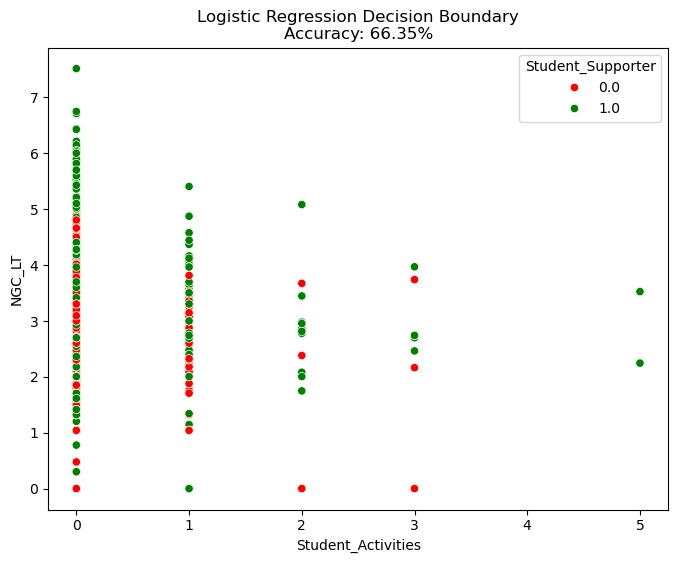

In [70]:
#Visualize the decision boundary with accuracy information, looking at NGC and Degree Years
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x50ss_test['KSM_STU_ACT_COUNT'], y=x50ss_test['NGC_LT_Log_10'], hue=y50ss_test, palette={
0: 'red', 1: 'green'}, marker='o')
#x = student_activity; y = NGC_LT_Log_10
plt.xlabel('Student_Activities')
plt.ylabel('NGC_LT')
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy50ss * 100))
plt.legend(title="Student_Supporter", loc="upper right")
plt.show()

In [71]:
print("AE Model Accuracy: {:.2f}%".format(accuracy * 100))
print("AE Model with Degree Years Accuracy: {:.2f}%".format(accuracydg * 100))
print("AE Model 50/50 Split Accuracy: {:.2f}%".format(accuracy50 * 100))
print("Accuracy 50/50 Split with Degree Years: {:.2f}%".format(accuracy50ss * 100))

AE Model Accuracy: 89.67%
AE Model with Degree Years Accuracy: 89.58%
AE Model 50/50 Split Accuracy: 72.36%
Accuracy 50/50 Split with Degree Years: 66.35%


<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

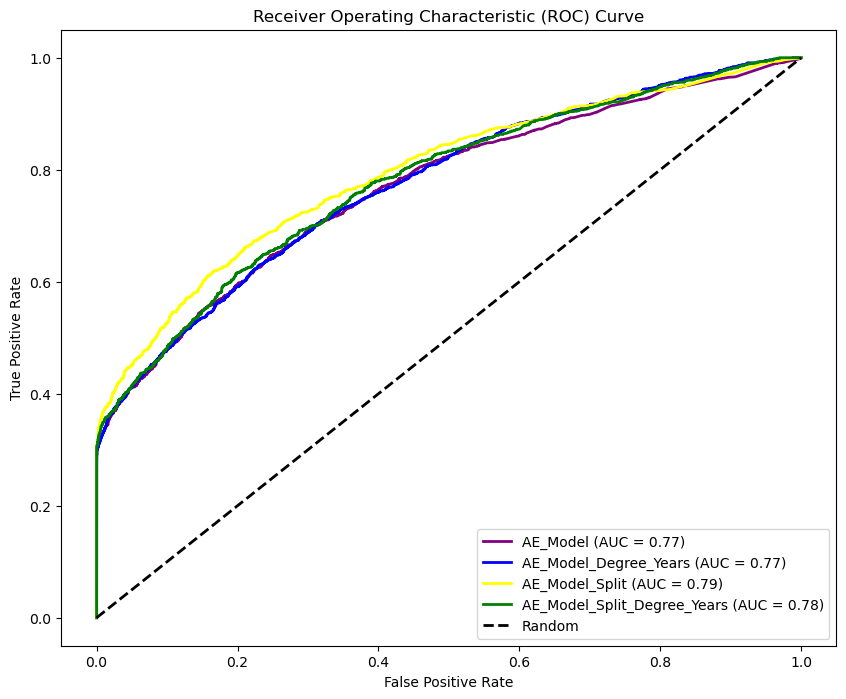

In [72]:
#Plot ROC Curve
#AE_Model
y_prob = log_reg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#AE_Model_Degree_Years
y_prob_dy = log_regdg.predict_proba(xdg_test)[:, 1]
fprdy, tprdy, thresholds = roc_curve(ydg_test, y_prob_dy)
roc_aucdy = auc(fprdy, tprdy)

#AE_Model_Split
y_prob_50 = log_reg50.predict_proba(x50_test)[:, 1]
fpr50, tpr50, thresholds = roc_curve(y50_test, y_prob_50)
roc_auc50 = auc(fpr50, tpr50)

#AE_Model_Split_Degree_Years
y_prob_50ss = log_reg50ss.predict_proba(x50ss_test)[:, 1]
fpr50ss, tpr50ss, thresholds = roc_curve(y50ss_test, y_prob_50ss)
roc_auc50ss = auc(fpr50ss, tpr50ss)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='purple', lw=2, label = f'AE_Model (AUC = {roc_auc:.2f})') #AE_Model - accuracy * 100
plt.plot(fprdy, tprdy, color='blue', lw=2, label = f'AE_Model_Degree_Years (AUC = {roc_aucdy:.2f})') #AE_Model_Degree_Years - accuracydg * 100
plt.plot(fpr50, tpr50, color='yellow', lw=2, label = f'AE_Model_Split (AUC = {roc_auc50:.2f})') #AE_Model_Split - accuracy50 * 100
plt.plot(fpr50ss, tpr50ss, color='green', lw=2, label = f'AE_Model_Split_Degree_Years (AUC = {roc_auc50ss:.2f})') #AE_Model_Split_Degree_Years - accuracy50ss * 100

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [73]:
Split_output_v3 = log_reg50.predict_proba(X50)[:, 1]
print(Split_output_v3)

[0.41539221 0.25597982 0.28466597 ... 0.25597982 0.20588073 0.20588073]


In [74]:
len(Split_output_v3)
# Can we get this for all alumni
## Import all alums, use mean for sum_stats for all alums without a score
## Run model
## Export all data to get scores
## Add into CATx as Segment > 'KEMS' with note in Comment '78.213109834(score) - Student Supporter score'

13110

### Importing all alumni file

In [76]:
#Assigning name to initial AE model output with 50/50 SS split and Degree Years dataset
AE_Model_aa = pd.read_csv('Alumni Engagement Model_Slim Counts_JulyFY23_Weighted_Updated for all alums_10.24.2024.csv', encoding = enc['encoding'], low_memory=False)
AE_Model_aa

,ID_NUMBER,KLC_CURRENT,KLC_LYBUNT,KSM_SPEAKER_COUNT_SQ,KSM_EVENT_HOST_COUNT_SQ,KSM_KCORPREC_COUNT,KSM_STU_ACT_COUNT,KSM_KAD_CALLER_COUNT,KSM_INTERVIEWER_COUNT,KSM_SPOUSE_COUNT,...,KSM_ACQ_REL_COUNT,KSM_INPER_EVENT_SQ,KSM_VIRT_EVENT_SQ,ALUMNICLUB_EXEC_ROLES,ALUMNICLUB_MEMBER_ROLES,CLOSEDPROP_FUNDED_SQ,NGC_LT_Log_10,sum_stats_sq,weighted_sum_stats,Student_Supporter
0,303500,1,1,3.162278,0.0,1,0,0,0,1,...,0,4.898979,1.000000,0,0,1.732051,6.319801,23.113109,19.996952,1
1,443879,1,1,0.000000,0.0,0,0,1,0,1,...,4,4.898979,5.830952,0,0,0.000000,4.874488,23.604419,17.267628,1
2,419308,0,0,0.000000,0.0,0,1,1,0,0,...,6,4.123106,9.591663,0,0,0.000000,3.877429,25.592198,16.636203,1
3,288836,1,0,0.000000,0.0,0,0,1,0,1,...,4,5.830952,5.000000,0,0,0.000000,4.849950,22.680902,16.432092,1
4,422908,1,1,1.000000,0.0,0,0,0,0,0,...,2,5.196152,4.123106,0,0,1.414214,4.904450,20.637922,15.291109,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68039,628093,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0
68040,580356,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0
68041,708736,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0
68042,289861,0,0,0.000000,0.0,0,0,0,0,0,...,0,0.000000,0.000000,0,0,0.000000,0.301030,0.301030,0.301030,0


In [77]:
#Splitting dataset in features (independent variables) and target variable (dependent variable)
feature_cols_aa = ['KLC_CURRENT', 'KLC_LYBUNT', 'KSM_SPEAKER_COUNT_SQ', 'KSM_EVENT_HOST_COUNT_SQ', 'KSM_KCORPREC_COUNT',
                'KSM_STU_ACT_COUNT', 'KSM_KAD_CALLER_COUNT', 'KSM_INTERVIEWER_COUNT', 'KSM_SPOUSE_COUNT', 'KSM_CHILD_COUNT',
                'KSM_NUC_REL_COUNT_SQ', 'KSM_NONNUC_REL_COUNT_SQ', 'KSM_ACQ_REL_COUNT', 'KSM_INPER_EVENT_SQ', 'KSM_VIRT_EVENT_SQ',
                'ALUMNICLUB_EXEC_ROLES', 'ALUMNICLUB_MEMBER_ROLES', 'CLOSEDPROP_FUNDED_SQ', 'NGC_LT_Log_10', 'weighted_sum_stats']
Xaa = AE_Model_aa[feature_cols_aa] # Features variables
Yaa = AE_Model_aa['Student_Supporter'] # Target variable

In [78]:
AA_Output = log_reg50.predict_proba(Xaa)[:, 1]
print(AA_Output)

[1.         0.9999738  0.99999618 ... 0.20588073 0.20588073 0.19840245]


In [79]:
all = pd.DataFrame({"ID" : AE_Model_aa['ID_NUMBER'], "AE_Model_Score" : AE_Model_aa['weighted_sum_stats'],"Predict_Proba" : log_reg50.predict_proba(Xaa)[:, 1], "Student_Supporter" : Yaa})
all

,ID,AE_Model_Score,Predict_Proba,Student_Supporter
0,303500,19.996952,1.000000,1
1,443879,17.267628,0.999974,1
2,419308,16.636203,0.999996,1
3,288836,16.432092,0.999972,1
4,422908,15.291109,0.999944,1
...,...,...,...,...
68039,628093,0.301030,0.205881,0
68040,580356,0.301030,0.205881,0
68041,708736,0.301030,0.205881,0
68042,289861,0.301030,0.205881,0


In [80]:
all.to_csv('Student_Support_Score_Output_11.1.2024.csv')

In [81]:
all.describe()

,ID,AE_Model_Score,Predict_Proba,Student_Supporter
count,68044.000000,68044.000000,68044.000000,68044.00000
mean,479999.011904,2.754652,0.579715,0.10477
std,215771.785390,1.454671,0.277090,0.30626
min,2168.000000,0.096910,0.198402,0.00000
25%,331717.000000,2.100371,0.316350,0.00000
50%,469301.500000,2.754652,0.475310,0.00000
75%,649093.250000,3.079543,0.902752,0.00000
max,892738.000000,19.996952,1.000000,1.00000


In [82]:
all.head(50)

,ID,AE_Model_Score,Predict_Proba,Student_Supporter
0,303500,19.996952,1.000000,1
1,443879,17.267628,0.999974,1
2,419308,16.636203,0.999996,1
3,288836,16.432092,0.999972,1
4,422908,15.291109,0.999944,1
5,301415,15.270368,0.999952,1
6,325625,15.152805,0.999894,1
7,306070,15.045610,1.000000,1
8,441704,15.028536,1.000000,1
9,548337,14.957468,1.000000,1


#Visualize output for sanity check by listing 0 and 1 categorically
#Calibration plot - bin responses 0-5%, 5.01-6%
#Calculate averages for groups for predicted and real
#Or plot Y = actual student supporter, binary
#Plot X is scores, plot against each other

<Axes: xlabel='Predict_Proba', ylabel='Student_Supporter'>

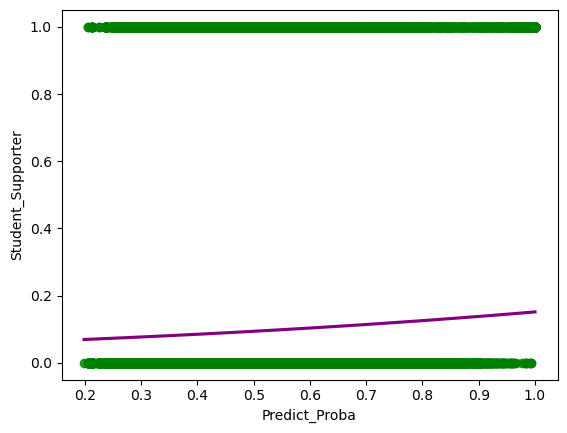

In [84]:
x=all['Predict_Proba']
y=all['Student_Supporter']
sns.regplot(x=x, y=y, data=all, logistic=True, ci=None,
scatter_kws={'color': 'green'}, line_kws={'color': 'purple'})

Text(0, 0.5, 'Student_Supporter - 1 or 0')

Text(0.5, 0, 'SS Model Score')

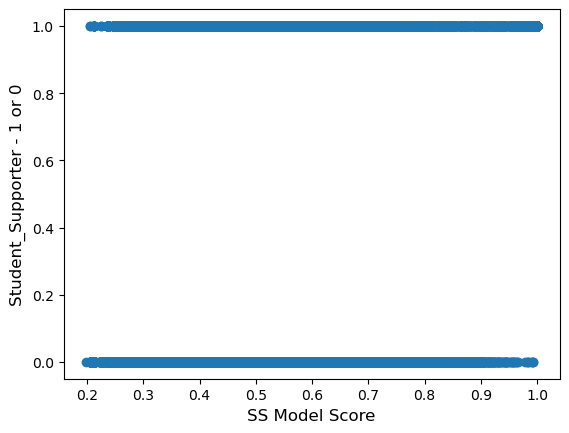

In [85]:
plt.scatter(x, y)
plt.ylabel('Student_Supporter - 1 or 0', fontsize = 12)
plt.xlabel('SS Model Score', fontsize = 12)

<Figure size 1000x1000 with 0 Axes>

Text(0, 0.5, 'Student_Supporter')

Text(0.5, 0, 'AE_Model_Score')

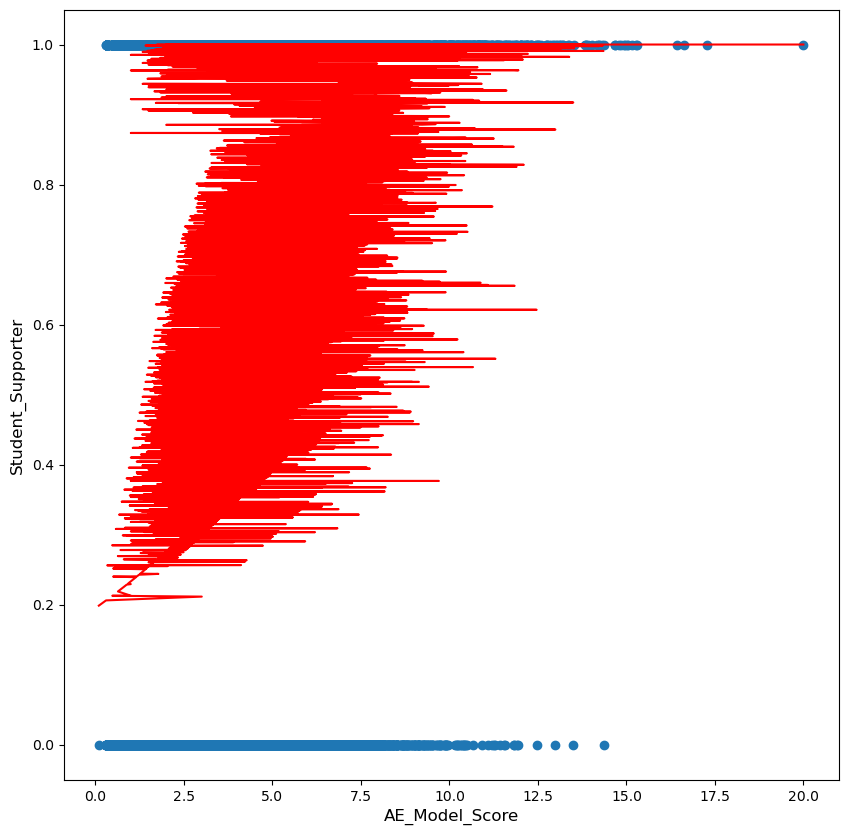

In [86]:
all_pp_sort = all.sort_values(['Predict_Proba'])
plt.figure(figsize=(10,10))
plt.scatter(all_pp_sort['AE_Model_Score'], all_pp_sort['Student_Supporter'])
plt.plot(all_pp_sort['AE_Model_Score'], all_pp_sort['Predict_Proba'].values, color='red')

plt.ylabel('Student_Supporter', fontsize = 12)
plt.xlabel('AE_Model_Score', fontsize = 12)
plt.show()

Text(0.2, 0.6, 'Classified as SS')

Text(0.2, 0.4, 'Classified as Non-SS')

(0.0, 1.0)

Text(0.5, 0, 'AE_Model_Score')

Text(0, 0.5, 'Probability of Student_Supporter')

Text(0.5, 1.0, 'Logistic Regression Predictions')

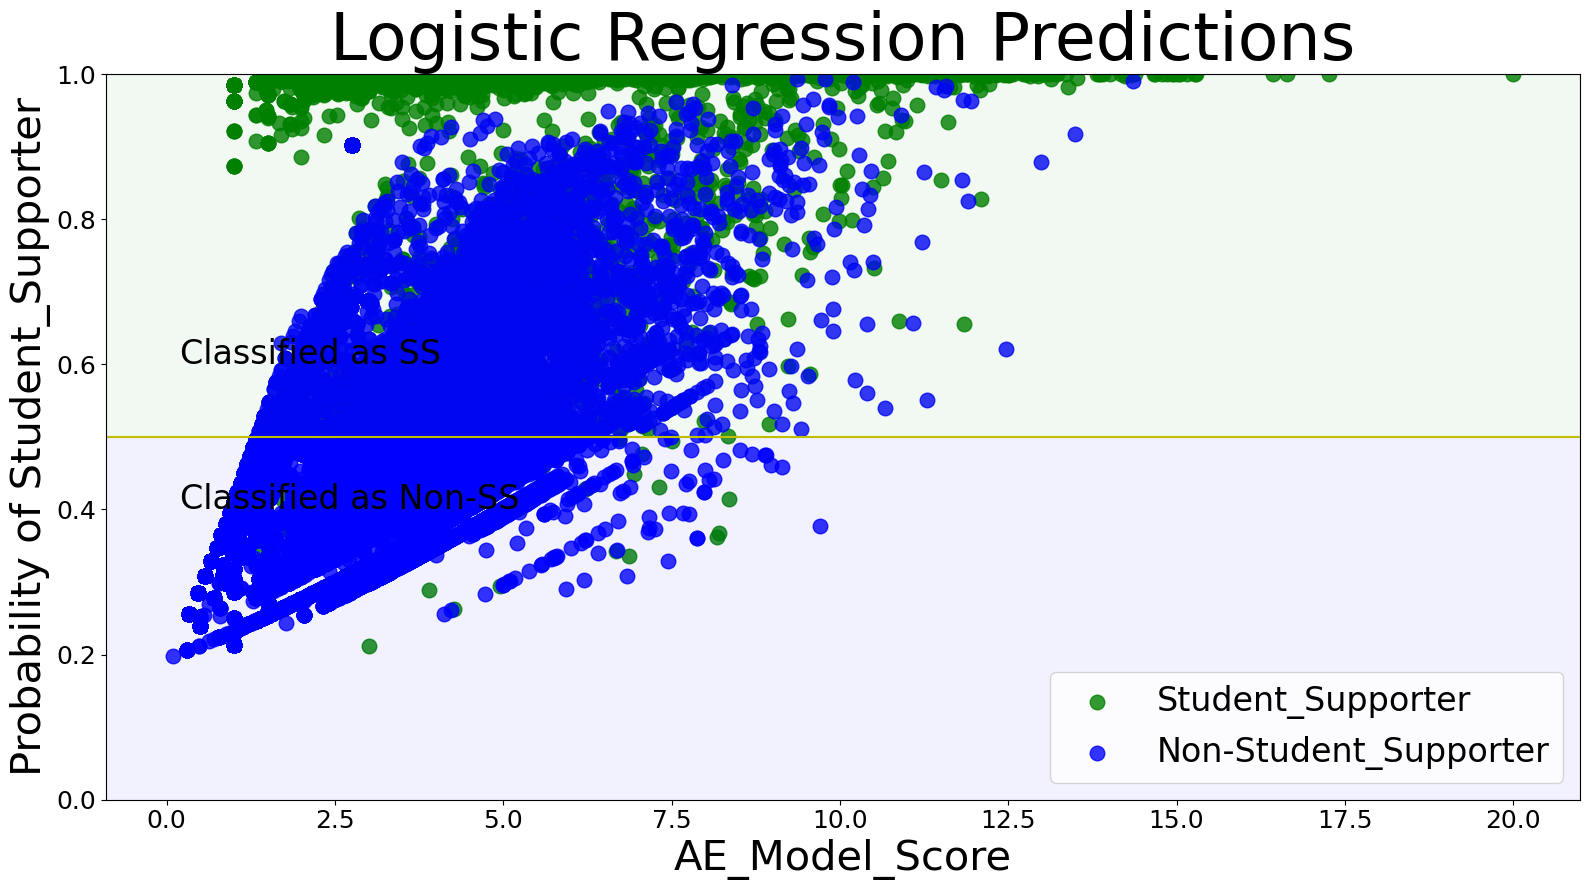

In [87]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,9), facecolor='white');


SSYFilter = all_pp_sort['Student_Supporter'] == 1
SSNFilter = all_pp_sort['Student_Supporter'] == 0

ax.scatter(all_pp_sort.loc[SSYFilter, 'AE_Model_Score'].values,
            all_pp_sort.loc[SSYFilter, 'Predict_Proba'].values,
           color = 'g',
           s = 110,
           alpha = .8,
           label = 'Student_Supporter')


ax.scatter(all_pp_sort.loc[SSNFilter, 'AE_Model_Score'].values,
            all_pp_sort.loc[SSNFilter, 'Predict_Proba'].values,
           color = 'b',
           s = 110,
           alpha = .8,
           label = 'Non-Student_Supporter')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.2, .6, 'Classified as SS', fontsize = 24)
ax.text(0.2, .4, 'Classified as Non-SS', fontsize = 24)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 24)
ax.tick_params(labelsize = 18)
ax.set_xlabel('AE_Model_Score', fontsize = 30)
ax.set_ylabel('Probability of Student_Supporter', fontsize = 30)
ax.set_title('Logistic Regression Predictions', fontsize = 48)

fig.tight_layout()

In [88]:
all_pp_sort

,ID,AE_Model_Score,Predict_Proba,Student_Supporter
68043,288804,0.096910,0.198402,0
68025,300735,0.301030,0.205881,1
68026,719520,0.301030,0.205881,1
68027,141740,0.301030,0.205881,0
68028,161046,0.301030,0.205881,0
...,...,...,...,...
29,357398,13.352095,1.000000,1
122,516441,10.980876,1.000000,1
491,441691,8.586793,1.000000,1
5480,550246,4.580090,1.000000,1


Text(0.5, 0, 'AE_Model_Score_bins')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Line Chart with Binned Data')

([<matplotlib.axis.XTick at 0x1ffa1a0a870>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

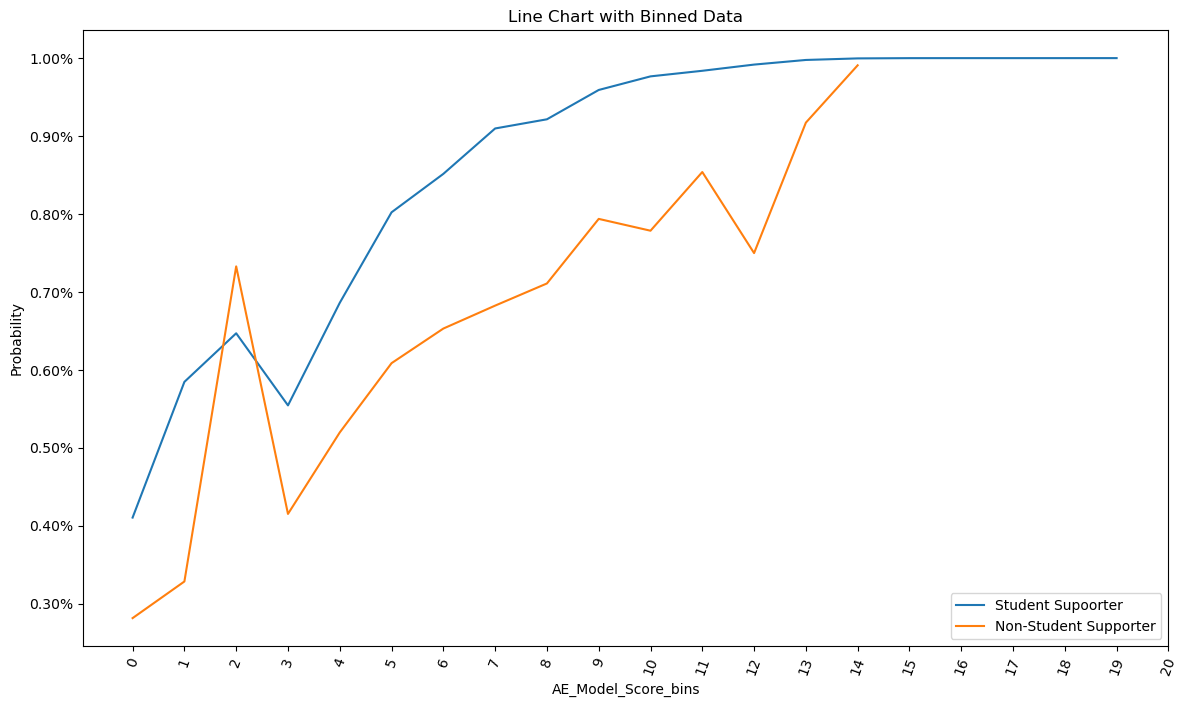

In [89]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (14,8), facecolor='white');

all_pp_sort['AE_Model_Score_bins'] = pd.cut(all_pp_sort['AE_Model_Score'], bins=20, labels=False)

SSYFilter = all_pp_sort[all_pp_sort['Student_Supporter'] == 1]
SSNFilter = all_pp_sort[all_pp_sort['Student_Supporter'] == 0]
#SSCalibration = all_pp_sort[all_pp_sort['Student_Supporter'] == 1 / all_pp_sort['Student_Supporter']]

binned_data_SS = SSYFilter.groupby('AE_Model_Score_bins')['Predict_Proba'].mean().reset_index()
binned_data_NSS = SSNFilter.groupby('AE_Model_Score_bins')['Predict_Proba'].mean().reset_index()
#binned_data_Cal = SSCalibration.groupby('AE_Model_Score_bins')['Predict_Proba'].mean().reset_index()

plt.plot(binned_data_SS['AE_Model_Score_bins'], binned_data_SS['Predict_Proba'])
plt.plot(binned_data_NSS['AE_Model_Score_bins'], binned_data_NSS['Predict_Proba'])
#plt.plot(all_pp_sort['AE_Model_Score_bins'], binned_data_SS['Predict_Proba'] / binned_data_SS['Predict_Proba'] + binned_data_NSS['Predict_Proba']) # remove if doesn't work
plt.xlabel('AE_Model_Score_bins')
plt.ylabel('Probability')
plt.title('Line Chart with Binned Data')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.xticks(bins)
plt.xticks(rotation=70)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100.00)) # need to convert decimal to percentage
plt.legend(["Student Supoorter", "Non-Student Supporter"], loc="lower right")
plt.show()

#plt.plot(all_pp_sort.loc[SSYFilter, 'AE_Model_Score_bins'].values, all_pp_sort.loc[SSYFilter, 'Predict_Proba'].values)

Text(0.5, 0, 'AE_Model_Score_bins')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Line Chart with Binned Data')

([<matplotlib.axis.XTick at 0x1ffa07512e0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

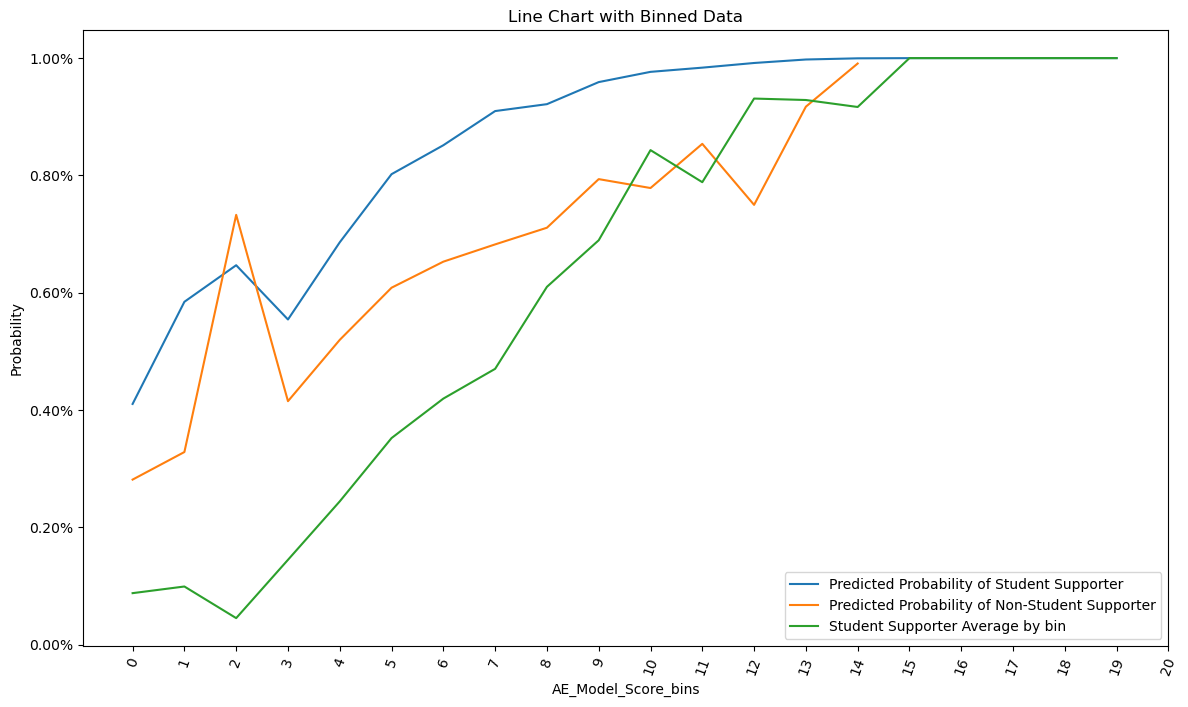

In [178]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (14,8), facecolor='white');

all_pp_sort['AE_Model_Score_bins'] = pd.cut(all_pp_sort['AE_Model_Score'], bins=20, labels=False)

SSYFilter = all_pp_sort[all_pp_sort['Student_Supporter'] == 1]
SSNFilter = all_pp_sort[all_pp_sort['Student_Supporter'] == 0]
#SSCalibration = all_pp_sort[all_pp_sort['Student_Supporter'] == 1 / all_pp_sort['Student_Supporter']]

binned_data_Cal_SSMean = all_pp_sort.groupby('AE_Model_Score_bins')['Student_Supporter'].mean().reset_index()
binned_data_SS = SSYFilter.groupby('AE_Model_Score_bins')['Predict_Proba'].mean().reset_index()
binned_data_NSS = SSNFilter.groupby('AE_Model_Score_bins')['Predict_Proba'].mean().reset_index()
binned_data_Cal = all_pp_sort.groupby(['AE_Model_Score_bins', 'Student_Supporter'])['Predict_Proba'].mean().reset_index()


#binned_data_Cal_v2['Calibration'] = binned_data_Cal['Student_Supporter'] == 0

plt.plot(binned_data_SS['AE_Model_Score_bins'], binned_data_SS['Predict_Proba'])
plt.plot(binned_data_NSS['AE_Model_Score_bins'], binned_data_NSS['Predict_Proba'])
plt.plot(binned_data_Cal_SSMean['AE_Model_Score_bins'], binned_data_Cal_SSMean['Student_Supporter'])
#plt.plot(binned_data_Cal['AE_Model_Score_bins'], binned_data_NSS['Predict_Proba'])
plt.xlabel('AE_Model_Score_bins')
plt.ylabel('Probability')
plt.title('Line Chart with Binned Data')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.xticks(bins)
plt.xticks(rotation=70)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100.00)) # need to convert decimal to percentage
plt.legend(["Predicted Probability of Student Supporter", "Predicted Probability of Non-Student Supporter", "Student Supporter Average by bin"], loc="lower right")
plt.show()

#plt.plot(all_pp_sort.loc[SSYFilter, 'AE_Model_Score_bins'].values, all_pp_sort.loc[SSYFilter, 'Predict_Proba'].values)

In [91]:
all_pp_sort
binned_data_Cal_SSMean
binned_data_SS.describe
binned_data_NSS.describe
binned_data_Cal.describe

,ID,AE_Model_Score,Predict_Proba,Student_Supporter,AE_Model_Score_bins
68043,288804,0.096910,0.198402,0,0
68025,300735,0.301030,0.205881,1,0
68026,719520,0.301030,0.205881,1,0
68027,141740,0.301030,0.205881,0,0
68028,161046,0.301030,0.205881,0,0
...,...,...,...,...,...
29,357398,13.352095,1.000000,1,13
122,516441,10.980876,1.000000,1,10
491,441691,8.586793,1.000000,1,8
5480,550246,4.580090,1.000000,1,4


,AE_Model_Score_bins,Student_Supporter
0,0,0.087772
1,1,0.099111
2,2,0.045212
3,3,0.144623
4,4,0.244275
5,5,0.352198
6,6,0.419467
7,7,0.470226
8,8,0.610039
9,9,0.689441


<bound method NDFrame.describe of     AE_Model_Score_bins  Predict_Proba
0                     0       0.410365
1                     1       0.584515
2                     2       0.646873
3                     3       0.554352
4                     4       0.685978
5                     5       0.802137
6                     6       0.851456
7                     7       0.909714
8                     8       0.921489
9                     9       0.959116
10                   10       0.976571
11                   11       0.983737
12                   12       0.991692
13                   13       0.997635
14                   14       0.999633
15                   15       0.999958
16                   16       0.999984
17                   17       0.999974
18                   19       1.000000>

<bound method NDFrame.describe of     AE_Model_Score_bins  Predict_Proba
0                     0       0.281370
1                     1       0.328374
2                     2       0.732761
3                     3       0.415075
4                     4       0.519636
5                     5       0.608541
6                     6       0.652945
7                     7       0.682386
8                     8       0.710815
9                     9       0.793687
10                   10       0.778508
11                   11       0.853825
12                   12       0.749794
13                   13       0.917203
14                   14       0.990776>

<bound method NDFrame.describe of     AE_Model_Score_bins  Student_Supporter  Predict_Proba
0                     0                  0       0.281370
1                     0                  1       0.410365
2                     1                  0       0.328374
3                     1                  1       0.584515
4                     2                  0       0.732761
5                     2                  1       0.646873
6                     3                  0       0.415075
7                     3                  1       0.554352
8                     4                  0       0.519636
9                     4                  1       0.685978
10                    5                  0       0.608541
11                    5                  1       0.802137
12                    6                  0       0.652945
13                    6                  1       0.851456
14                    7                  0       0.682386
15                    7               

In [92]:
outfile = zip(AE_Model_aa['ID_NUMBER'],Yaa, AA_Output)
print(outfile)

In [93]:
#Resources
#https://www.youtube.com/watch?v=VK6v9Ure8Lk -- Python Marathon - Logistic Regression Python Sklearn
#https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#https://www.datacamp.com/tutorial/understanding-logistic-regression-python
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#https://programminghistorian.org/en/lessons/logistic-regression
#https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=The%20ROC%20curve%20is%20a,holdover%20from%20WWII%20radar%20detection.
#https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/
#df.to_csv(file_name, sep=',', encoding='utf-8')
#np.savetxt('AA_Output.csv', outfile, delimiter=',')